In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

sns.set_theme(style="darkgrid")
sns.set_palette("hls")

In [2]:
df = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')

# Lower case all column names 
df.columns = df.columns.str.lower()

In [3]:
df.head() 

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape

(2823, 25)

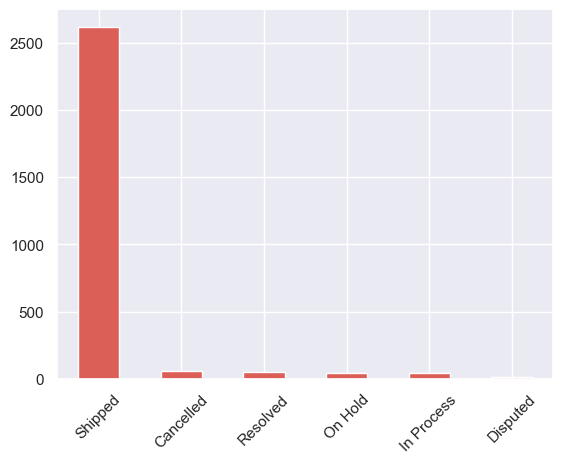

In [5]:
df.status.value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Since we care about only shipped / completed orders for now apply the "Shipped" filter 

df = df[df.status == "Shipped"]
df.shape

(2617, 25)

In [7]:
df.customername.nunique()

92

In [8]:
df.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,qtr_id,month_id,year_id,msrp
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,10252.286970,34.926634,83.712239,6.453955,3550.439847,2.756974,7.211693,2003.762323,101.067635
std,89.197311,9.363944,20.214438,4.225247,1823.519150,1.214942,3.701946,0.672234,40.518463
min,10100.000000,6.000000,27.220000,1.000000,553.950000,1.000000,1.000000,2003.000000,33.000000
25%,10176.000000,27.000000,68.710000,3.000000,2204.100000,2.000000,4.000000,2003.000000,68.000000
50%,10255.000000,34.000000,96.230000,6.000000,3183.290000,3.000000,8.000000,2004.000000,99.000000
75%,10326.000000,43.000000,100.000000,9.000000,4498.190000,4.000000,11.000000,2004.000000,127.000000
max,10419.000000,97.000000,100.000000,18.000000,12536.500000,4.000000,12.000000,2005.000000,214.000000


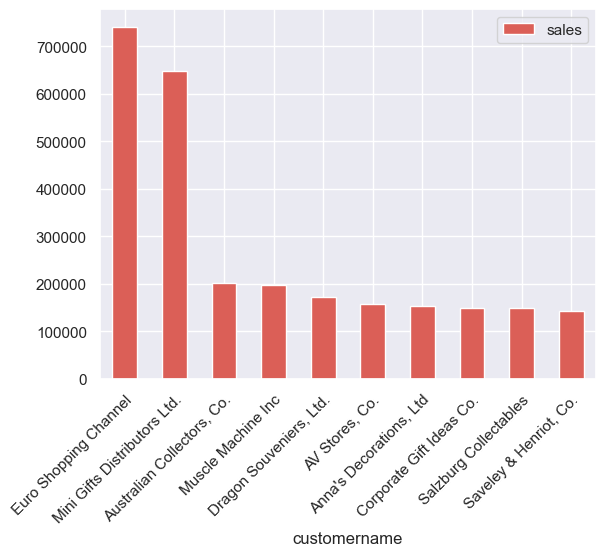

In [9]:
grouped_df = df.groupby('customername')['sales'].sum().reset_index()
grouped_df = grouped_df.sort_values('sales', ascending=False)
grouped_df.head(10).plot(kind="bar", x='customername', y='sales')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [10]:
# Describe is an extremely useful method to very easily calculate a lot of interesting metrics we learned about
# The downside is that not all of the information here may be useful 
# You will have to wear your business hat & decide what if any is useful for the business
df.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,qtr_id,month_id,year_id,msrp
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,10252.286970,34.926634,83.712239,6.453955,3550.439847,2.756974,7.211693,2003.762323,101.067635
std,89.197311,9.363944,20.214438,4.225247,1823.519150,1.214942,3.701946,0.672234,40.518463
min,10100.000000,6.000000,27.220000,1.000000,553.950000,1.000000,1.000000,2003.000000,33.000000
25%,10176.000000,27.000000,68.710000,3.000000,2204.100000,2.000000,4.000000,2003.000000,68.000000
50%,10255.000000,34.000000,96.230000,6.000000,3183.290000,3.000000,8.000000,2004.000000,99.000000
75%,10326.000000,43.000000,100.000000,9.000000,4498.190000,4.000000,11.000000,2004.000000,127.000000
max,10419.000000,97.000000,100.000000,18.000000,12536.500000,4.000000,12.000000,2005.000000,214.000000


In [11]:
# Describe the total number of transactions 
# We are left with 2,617 observations to explore 
# Each observational unit or sample is a single customer transaction 

df.shape

(2617, 25)

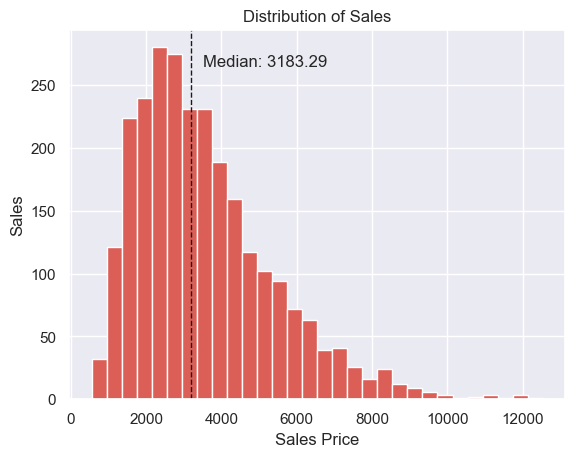

In [12]:
x = df.sales
x.hist(bins=30)
plt.xlabel("Sales Price")
plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
plt.title("Distribution of Sales")
plt.ylabel("Sales")
plt.show()

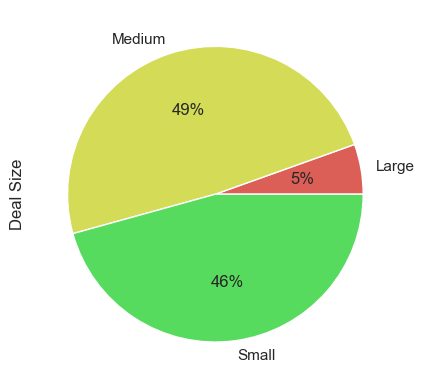

In [25]:
# Question: In terms of deal size, what % of deals are small, medium, large deals
# We can use one line of code to obtain the results below 
# Keep in mind there are dozens of libraries and methods we can use to visualize our data 
# Explore different stylistic options and utilize your design skills to make a chart look good
# Business callout: Most of our deals are medium sized and large deals are the minority  
df.dealsize.str.get_dummies().sum().plot.pie(label='Deal Size', autopct='%1.0f%%')
plt.show()

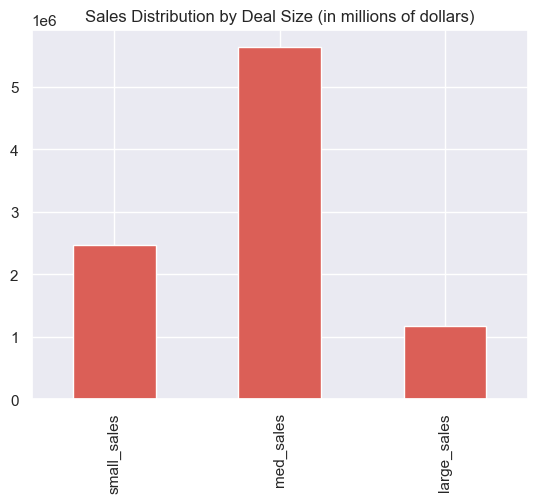

In [43]:
df['orderdate'] = pd.to_datetime(df['orderdate'])

small_df = df[df.dealsize == "Small"]
med_df = df[df.dealsize == "Medium"]
large_df = df[df.dealsize == "Large"]

res_small_df = small_df.resample(rule='M', on='orderdate')['sales'].sum().reset_index()
res_small_df = res_small_df.rename(columns={"sales": "small_sales"})
res_med_df = med_df.resample(rule='M', on='orderdate')['sales'].sum().reset_index()
res_med_df = res_med_df.rename(columns={"sales": "med_sales"})
res_large_df = large_df.resample(rule='M', on='orderdate')['sales'].sum().reset_index()
res_large_df = res_large_df.rename(columns={"sales": "large_sales"})
joined_df = pd.merge(res_small_df, res_med_df, on='orderdate')
joined_df = pd.merge(joined_df, res_large_df, on='orderdate', how='left')
joined_df.sum().plot(kind="bar")
plt.title("Sales Distribution by Deal Size (in millions of dollars)")
plt.show()

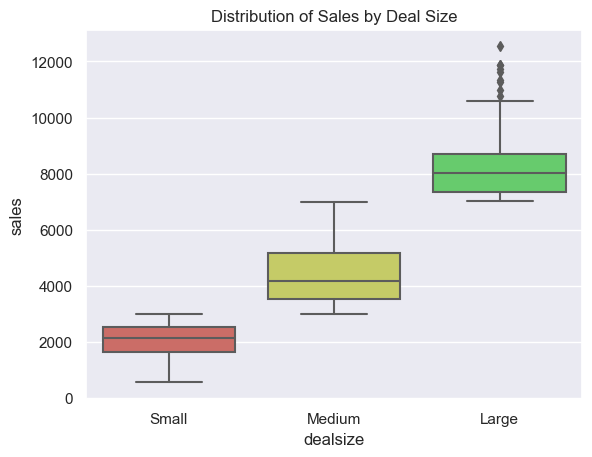

In [28]:
ax = sns.boxplot(x="dealsize", y="sales", data=df)  
plt.title("Distribution of Sales by Deal Size")
plt.show()

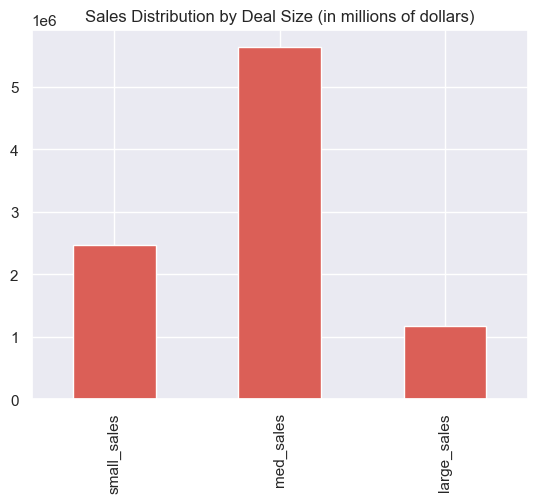

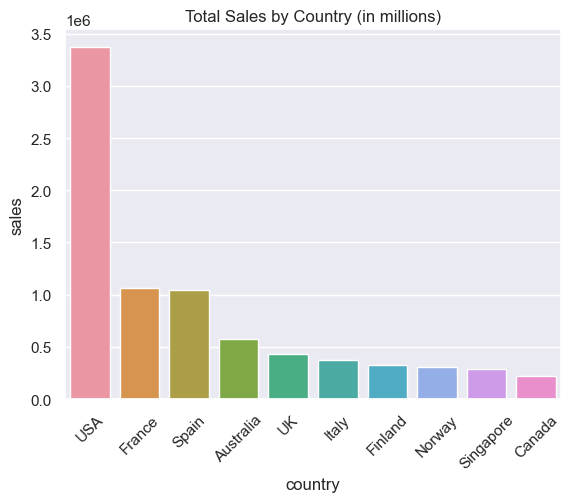

In [30]:
# Which 10 countries in which customers live produced the most sales for our business? 
# We see USA customers are in the lead with sales, followed by France and then Spain
# The colors are randomly selected here 
grouped_df = df.groupby(['country'])['sales'].sum().reset_index()
ten_df = grouped_df.sort_values('sales', ascending=False).head(10)
sns.barplot(x='country', y='sales', data=ten_df)
plt.xticks(rotation=45)
plt.title("Total Sales by Country (in millions)")
plt.show() 

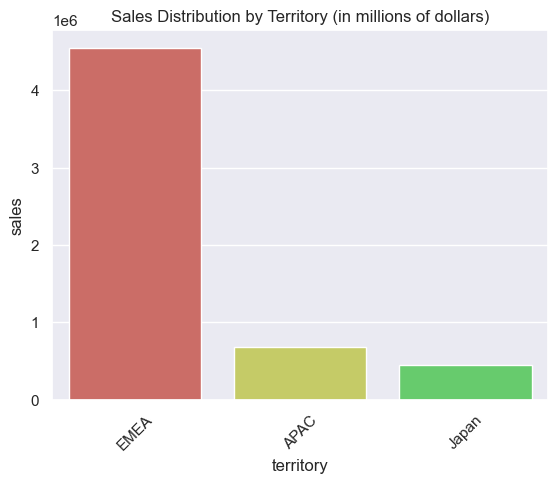

In [32]:
 # Which territory produced the most sales?
grouped_df = df.groupby(['territory'])['sales'].sum().reset_index()
ten_df = grouped_df.sort_values('sales', ascending=False).head(10)
sns.barplot(x='territory', y='sales', data=ten_df)
plt.title("Sales Distribution by Territory (in millions of dollars)")
plt.xticks(rotation=45)
plt.show()

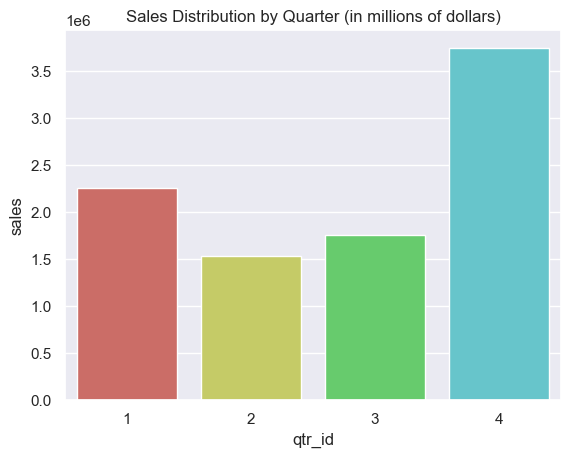

In [33]:
# What quarter do we have the total most sales?  
# Here we will utilize the sum of sales instead of mean of sales per quarter  
grouped_df = df.groupby('qtr_id')['sales'].sum().reset_index()
ten_df = grouped_df.sort_values('sales', ascending=False).head(10)
sns.barplot(x='qtr_id', y='sales', data=ten_df)
plt.title("Sales Distribution by Quarter (in millions of dollars)")
plt.show()

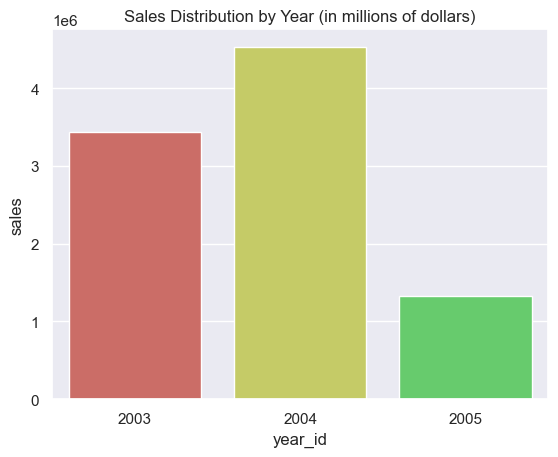

In [34]:
# What is the total sales per year?   
grouped_df = df.groupby('year_id')['sales'].sum().reset_index()
ten_df = grouped_df.sort_values('sales', ascending=False).head(10)
sns.barplot(x='year_id', y='sales', data=ten_df)
plt.title("Sales Distribution by Year (in millions of dollars)")
plt.show()

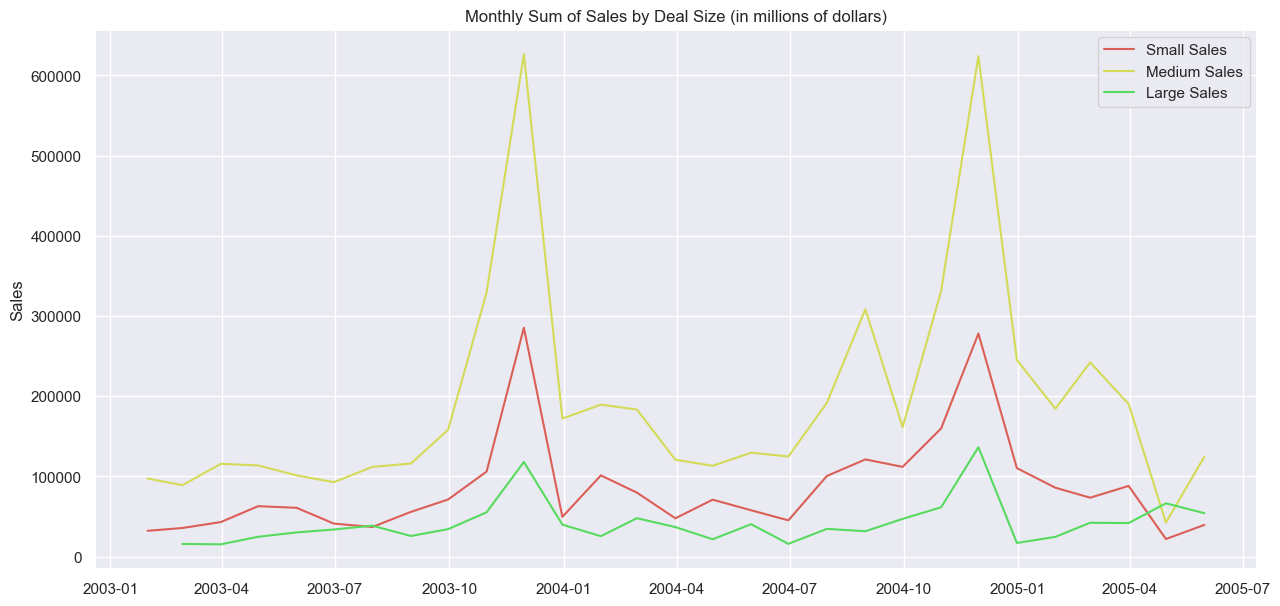

In [47]:
# We can confirm that medium size sales are the largest for our business
# Callout: Seasonal spiking pattern observed around December / holiday 

plt.figure(figsize=(15,7))  
plt.plot(joined_df['orderdate'], joined_df["small_sales"], label ='Small Sales')
plt.plot(joined_df['orderdate'], joined_df["med_sales"], label ='Medium Sales')
plt.plot(joined_df['orderdate'], joined_df["large_sales"], label ='Large Sales')

plt.title("Monthly Sum of Sales by Deal Size (in millions of dollars)")
plt.ylabel("Sales")
plt.legend(loc='upper right')
plt.show()

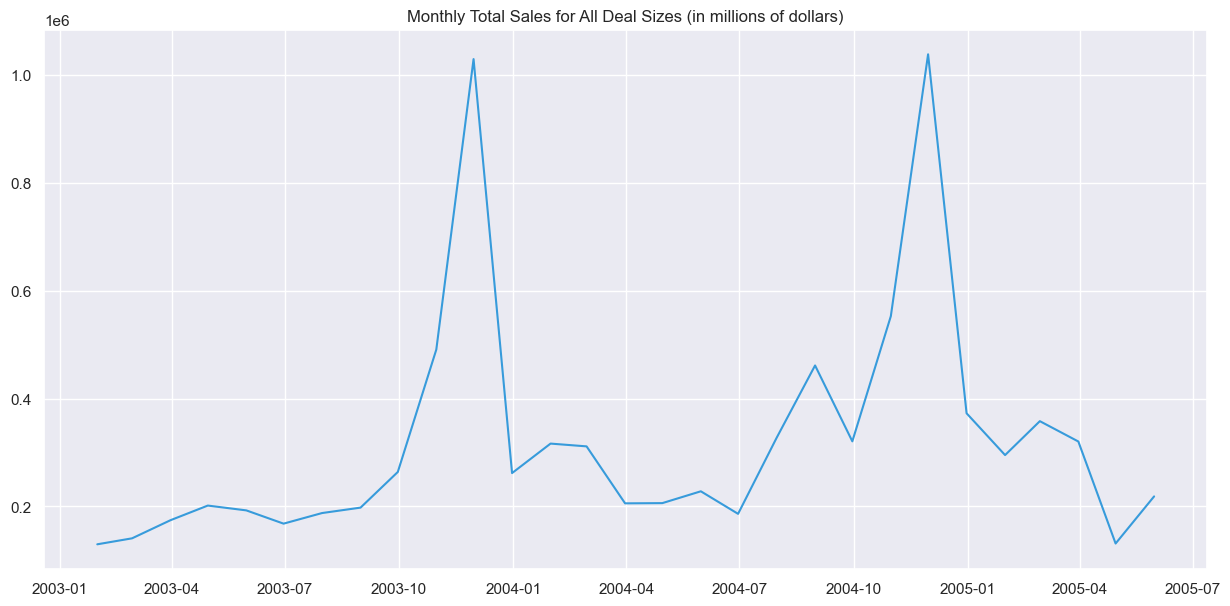

In [48]:
# How does total sales change over time for all deal sizes?  
# We can call out the same seasonal spikes occur in Christmas 
resampled_df = df.resample(rule='M', on='orderdate')['sales'].sum().reset_index()
resampled_df.set_index('orderdate', inplace=True)
plt.figure(figsize=(15,7))
plt.title("Monthly Total Sales for All Deal Sizes (in millions of dollars)")
plt.plot(resampled_df["sales"], color='#379BDB')
plt.show()